In [1]:
import numpy as np
import matplotlib.pyplot as plt

/home/eia/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


## A*

In [2]:
class Node():
    """A node class for A* Pathfinding"""

    def __init__(self, parent=None, position=None):
        self.parent = parent
        self.position = position

        self.g = 0
        self.h = 0
        self.f = 0

    def __eq__(self, other):
        return self.position == other.position

    def __hash__(self):               #<-- added a hash method
        return hash(self.position)


def astar(maze, start, end):
    """Returns a list of tuples as a path from the given start to the given end in the given maze"""

    # Create start and end node
    start_node = Node(None, start)
    end_node = Node(None, end)

    # Initialize both open and closed list
    open_list = []
    closed_list = set()                # <-- closed_list must be a set

    # Add the start node
    open_list.append(start_node)

    # Loop until you find the end
    while len(open_list) > 0:

        # Get the current node
        current_node = open_list[0]
        current_index = 0
        for index, item in enumerate(open_list):
            if item.f <= current_node.f:
                current_node = item
                current_index = index

        # Pop current off open list, add to closed list
        open_list.pop(current_index)
        closed_list.add(current_node)  

        # Found the goal
        if current_node == end_node:
            path = []
            current = current_node
            while current is not None:
                path.append(current.position)
                current = current.parent
            return path[::-1] # Return reversed path

        # Generate children
        children = []
        for new_position in [(0, -1), (0, 1), (-1, 0), (1, 0), (-1, -1), (-1, 1), (1, -1), (1, 1)]: # Adjacent squares

            # Get node position
            node_position = (current_node.position[0] + new_position[0], current_node.position[1] + new_position[1])

            # Make sure within range
            if node_position[0] > (len(maze) - 1) or node_position[0] < 0 or node_position[1] > (len(maze[len(maze)-1]) -1) or node_position[1] < 0:
                continue

            # Make sure walkable terrain
            if maze[node_position[0]][node_position[1]] != 0:
                continue

            # Create new node
            new_node = Node(current_node, node_position)

            # Append
            children.append(new_node)

        # Loop through children
        for child in children:

            # Child is on the closed list
            if child in closed_list:             
                continue

            # Create the f, g, and h values
            cost = np.sqrt((child.position[0] - current_node.position[0])**2 + (child.position[1] - current_node.position[1])**2)
            child.g = current_node.g + cost
            #child.h = np.sqrt((end_node.position[0] - child.position[0])**2) + ((end_node.position[1] - child.position[1])**2)
            child.h = abs(end_node.position[0] - child.position[0]) + abs(end_node.position[1] - child.position[1])
            child.f = child.g + child.h

            # Child is already in the open list
            if child in open_list:
                i = open_list.index(child)
                if child.g > open_list[i].g:
                    continue
            # for open_node in open_list:
            #     if child == open_node and child.g > open_node.g:
            #         continue
                

            # Add the child to the open list
            open_list.append(child)


In [3]:
# maze = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#         [1, 0, 1, 0, 1, 1, 1, 0, 1, 1],
#         [1, 0, 1, 0, 1, 0, 0, 0, 0, 0],
#         [1, 1, 1, 0, 1, 0, 0, 1, 1, 1],
#         [1, 0, 1, 1, 1, 0, 0, 0, 0, 0],
#         [0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
#         [0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
#         [0, 0, 0, 0, 1, 1, 1, 1, 1, 0],
#         [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
#         [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]]
maze = np.zeros((50,50))
maze[10:20,10:12] = 1
maze[25:35,15:25] = 1
maze[30:45,30:32] = 1
maze[30:32,30:] = 1
maze[10:12,:20] = 1

start = (0, 0)
end = (40, 20)
# end = (8,8)

path = astar(maze, start, end)

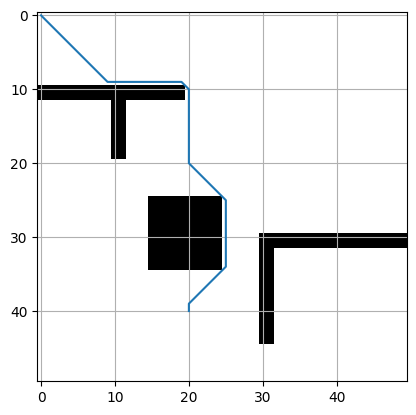

In [4]:
plt.imshow(maze, cmap='binary')
plt.plot(np.array(path)[:,1],np.array(path)[:,0])
# plt.xticks(np.arange(len(maze[0])))
# plt.yticks(np.arange(len(maze)))
plt.grid()

### Map from file

In [5]:
import cv2

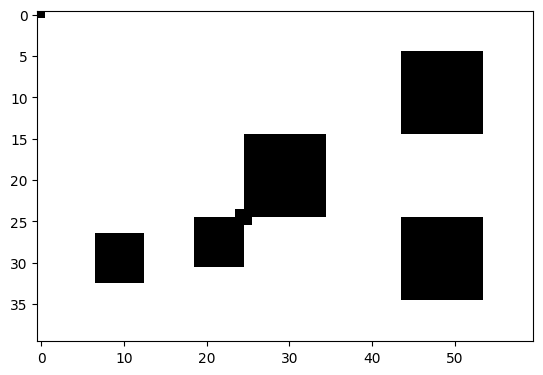

In [6]:
map = cv2.imread("test_map2.jpg")
map = cv2.cvtColor(map, cv2.COLOR_BGR2GRAY)
map = cv2.threshold(map, 128, 1, cv2.THRESH_BINARY_INV)[1]
#map = cv2.resize(map, (40,60))
plt.imshow(map, cmap='binary')

In [7]:
start = (20, 5)
end = (25, 40)

path = astar(map, start, end)

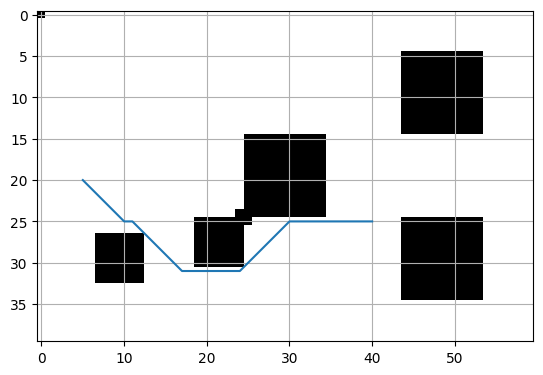

In [8]:
plt.imshow(map, cmap='binary')
plt.plot(np.array(path)[:,1],np.array(path)[:,0])
plt.grid()